
When using machine learning, you usually follow these steps:

1. Pick a type of model (like decision tree, SVM, etc.)
2. Choose settings for the model (called **hyperparameters**)
3. Train the model using some data
4. Use the model to predict new data

But to make sure your model and its settings are **actually good**, you need to **validate** it—basically, test how well it works.

This might sound easy (just check how well it predicts on the training data), but that can be **misleading**. So, better ways are used, like:

* **Holdout sets** (keep some data aside just for testing)
* **Cross-validation** (test the model on different parts of the data)

These techniques help you avoid mistakes and make sure your model works well on **new, unseen data**.


This example demonstrates the wrong way to validate a machine learning model. It trains a model on the entire dataset and then tests it on the same dataset. As a result, the model shows a 100% accuracy, but this is misleading because it's simply memorizing the training data, not generalizing to new, unseen data.
The main message (moto) is:

Never validate your model on the same data it was trained on. Always test on unseen data to get a realistic estimate of performance.

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target


load_iris() loads the famous Iris flower dataset.

X = iris.data assigns the features (sepal/petal length and width) to X.

y = iris.target assigns the labels (flower species: Setosa, Versicolor, Virginica) to y.

In [3]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

model.fit(X, y)


KNeighborsClassifier(n_neighbors=1)

We import the k-nearest neighbors classifier.

n_neighbors=1 means: to classify a new data point, the model looks at just 1 nearest neighbor and assigns that label.

In [4]:
y_model = model.predict(X)


In [5]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)


1.0

We compare the actual labels y with predicted labels y_model.

It gives a score of 1.0 (i.e., 100% accurate), but this is not a realistic evaluation.



 ### Why This Approach is Wrong:
Same data used for training and testing: The model is tested on the data it already knows.

k-NN with k=1 is prone to overfitting on training data.

This leads to optimistic results which do not reflect real-world performance.

# Model Validation the Right Way (Holdout Sets)

This section shows the correct way to validate a machine learning model using a holdout set.
Instead of training and testing on the same data (which leads to overfitting), we split the data into two parts:

One part for training

The other for testing (validation)

This gives a realistic measure of how well the model will perform on new, unseen data. In this example, the accuracy drops from a misleading 100% to a more realistic 90.6%.

In [6]:
from sklearn.model_selection import train_test_split

X1, X2, y1, y2 = train_test_split(X, y, random_state=0, train_size=0.5)


X and y are split into two sets:

X1, y1: training set (50% of data)

X2, y2: test/validation set (50% of data)

random_state=0 ensures the split is reproducible every time you run it.

🧠 Why this is done: The model needs to be trained on one part (X1, y1) and tested on another (X2, y2) that it hasn't seen.

In [7]:
model.fit(X1, y1)

y2_model = model.predict(X2)

accuracy_score(y2, y2_model)



0.9066666666666666

### Why This Is the Right Way:
Avoids overfitting: The model doesn't just memorize the data.

Simulates real-world performance: The test set represents new, unseen data.

More trustworthy: You now have a realistic estimate of how your model will perform in practice.

### Optional Improvement: Use test_size Instead of train_size

More common in real projects.

It keeps 70% training / 30% testing, which is a good default.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Model Validation via Cross-Validation

Cross-validation is a better model validation technique than a simple holdout set. Instead of splitting data once, we split it multiple times to ensure every point gets a chance to be both in training and validation.

This helps us:

Use all the data for training and testing, improving performance.

Get a better estimate of model accuracy by averaging results across folds.

There are different cross-validation types:

K-Fold (e.g. 2-fold, 5-fold)

Leave-One-Out (extreme form of K-Fold where k = n, i.e., every point is validated once while others are used for training)

###  2-Fold Cross Validation (Manual)

In [9]:
# First Half of data for training, second half for testing
y2_model = model.fit(X1, y1).predict(X2)

# Now reverse: second half for training, first half for testing
y1_model = model.fit(X2, y2).predict(X1)

# Calculate accuracy for both splits
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)


(0.96, 0.9066666666666666)

 Logic:

Train once on first half, test on second.

Train again on second half, test on first.

Get two scores → Take the average for final accuracy.

✅ Motive: Every sample is used once for testing, making it more fair than a single split.

### 5-Fold Cross Validation Using cross_val_score

https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.03-5-fold-CV.png

In 5-Fold Cross Validation:

The dataset is split into 5 equal parts (called "folds").

The model is trained on 4 folds and tested on the remaining 1 fold.

This process is repeated 5 times, each time using a different fold as the test set.

The results are averaged to get the final performance score.

### Why Use It?
To avoid overfitting.

To get a more accurate performance estimate than just a single train/test split.

Especially useful when data is limited.



In [4]:
# STEP 1: Import necessary libraries
from sklearn.datasets import load_iris                    # Load example dataset
from sklearn.model_selection import cross_val_score       # For cross-validation
from sklearn.neighbors import KNeighborsClassifier        # Example model

# STEP 2: Load the dataset
iris = load_iris()       # Load Iris flower dataset
X = iris.data            # Feature matrix (4 features per sample)
y = iris.target          # Target labels (0 = Setosa, 1 = Versicolor, 2 = Virginica)

# STEP 3: Create a machine learning model
model = KNeighborsClassifier(n_neighbors=1)  # Use KNN model with 1 nearest neighbor

# STEP 4: Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5)  # cv=5 means 5-fold cross-validation

# Each element in 'scores' is the accuracy score for one of the 5 validation folds
print("Cross-validation scores for each fold:", scores)

# STEP 5: Calculate average accuracy across all 5 folds
print("Average cross-validation accuracy:", scores.mean())


Cross-validation scores for each fold: [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
Average cross-validation accuracy: 0.96


## Real-World Use Case Example
You're working on a flower classification app using a small dataset (like Iris).
You don't want to waste data on just a train/test split.

So instead of:

Training on 70% and testing on 30% (holdout method),

You perform 5-Fold CV, ensuring every sample is used for both training and testing.

This helps you decide:

"Is KNN with 1 neighbor good enough, or should I try 3 or 5 neighbors?"

| Component | Meaning                                                             |
| --------- | ------------------------------------------------------------------- |
| `model`   | Your ML model (e.g. KNN, Decision Tree, SVM)                        |
| `X`       | Feature matrix (input data)                                         |
| `y`       | Labels (target classes)                                             |
| `cv=5`    | Split the data into 5 folds; each fold is used once for testing     |
| `returns` | An array of 5 accuracy scores (or other metric, depending on setup) |


## Selecting the Best Model
When your machine learning model isn’t performing well, it's important to know how to fix it. You have a few options:

Try a more complex model

Try a simpler model

Collect more training data

Add more features (details) to your data

But it’s not always obvious what will help. Sometimes, making the model more complex or adding more data can actually make things worse. Knowing the right step to take is what makes someone good at machine learning.

# The Bias-variance trade-off

### 🎯 **Goal:**

We want to build a machine learning model that makes good predictions—not just on the training data, but also on new, unseen data. The challenge is to find the **right balance** between:

* **Bias** (being too simple)
* **Variance** (being too complex)

---

## 📊 **Figure 1: Two Regression Fits (Bias vs Variance)**



![Bias-Variance Figure](https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.03-bias-variance.png)

Imagine you're drawing a line to fit some scattered dots (data points):

* **Left image (Underfitting / High Bias):**
  A straight line is used, but the data is clearly not linear.
  ➤ It **misses the pattern** → does a poor job on both training and new data.

* **Right image (Overfitting / High Variance):**
  A wiggly curve that bends through every point.
  ➤ It **memorizes the training data**, including noise → fails badly on new data.

---

## 🔮 **Figure 2: Prediction on New Data**

 ![Figure link](https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.03-bias-variance-2.png)

This figure shows how those same two models perform on **new test data**:

* **Underfitting model (left):**
  Predictions are **consistently bad** on both training and test data.

* **Overfitting model (right):**
  Predictions are **great on training**, but **terrible on test data**.
  The model was too flexible and learned **noise**, not the real pattern.

✳️ The scores shown (\$R^2\$ values) tell how well the models are doing.
Lower scores on test data indicate poor generalization.

---

## 📈 **Figure 3: Validation Curve**

![Figure link](https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.03-validation-curve.png)

This shows how model performance changes as we make the model **more complex**:

* **Left side (Simple model / High Bias):**
  Both training and test scores are **low** → model is too simple.

* **Right side (Complex model / High Variance):**
  Training score is **very high**, but test score is **low** → model is too complex.

* **Middle (Sweet spot):**
  Training score is **pretty good**, and test score is **also high**.
  ✅ This is the **best point**—a good trade-off between bias and variance.

---

### 🧠 **Key Takeaways (in simple terms):**

* A model that is too simple **misses the real pattern** → underfits.
* A model that is too complex **learns noise** → overfits.
* You want a model that's **just right** → good enough to learn the pattern but not so flexible that it memorizes noise.
* The **validation curve** helps you find that balance.




## 🎯 **Goal**:

We want to understand how the **complexity of a model** affects its performance on data. We're using **polynomial regression** to do this.

---

### 🔢 **What is Polynomial Regression?**

Polynomial regression is like regular linear regression, but it adds powers (squares, cubes, etc.) of the input features to allow the model to fit **curved** lines, not just straight ones.

* **Degree 1** = straight line
  Example: `y = ax + b`

* **Degree 3** = more flexible curve
  Example: `y = ax³ + bx² + cx + d`

The **higher the degree**, the more flexible (and complex) the curve the model can draw.

---

### 🔧 **What is Being Tested?**

We want to find out:

* Which polynomial degree (how complex the model is) gives the **best** performance?
* When does the model start **overfitting** the data?

---

### ✅ **Training vs Validation**

* **Training score** = how well the model fits the data it learned from.
* **Validation score** = how well it works on **new/unseen** data.

Too **simple** a model (low degree) → **underfitting** (misses important patterns)
Too **complex** a model (high degree) → **overfitting** (memorizes noise)

---

### 📉 **Validation Curve**

A **validation curve** shows how training and validation scores change as we increase the **model complexity** (in this case, the degree of the polynomial).

* If degree is too **low**: both scores are low → underfitting
* If degree is **just right**: validation score peaks → good fit
* If degree is too **high**: training score is high, but validation score drops → overfitting

---

### 🛠️ **In Scikit-Learn**

We use tools like:

* `PolynomialFeatures` to add powers of input (e.g., x², x³…)
* `LinearRegression` to fit the data
* `Pipeline` to combine both into one clean model
* `validation_curve` to automatically test different degrees and give us scores

---

### 🧠 Bottom Line

We’re using **polynomial regression** with **cross-validation** to figure out the **best model complexity** — not too simple, not too complex — using a **validation curve** to guide us.




## you're building polynomial regression models of different degrees to:

Visualize how the model fits the data

Use cross-validation to find the optimal degree (complexity)

Plot a validation curve to show how training and validation scores change with complexity

### Main Goal: Find the best polynomial degree (1? 3? 10?) that fits our data without being too simple (underfitting) or too complex (overfitting).

### Import required modules and define a Polynomial Regression function

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    # degree=2 sets the default polynomial degree (quadratic if not specified)
    # **kwargs collects any additional named arguments passed to this function
    
    # make_pipeline creates a pipeline of transformations and estimators:
    return make_pipeline(
        PolynomialFeatures(degree),  # STEP 1: Generate polynomial features up to the given degree
                                    # For example, if degree=3 and input x, features will be [1, x, x², x³]
        LinearRegression(**kwargs)   # STEP 2: Fit a linear regression model on these polynomial features
                                    # The **kwargs passes any extra options directly to LinearRegression
                                    # For example, fit_intercept=False or normalize=True can be passed here
    )

# Example: if called as PolynomialRegression(degree=3, fit_intercept=False),
# then kwargs will be {'fit_intercept': False} and LinearRegression will be initialized accordingly.


### What it does:
Combines two steps into one "pipeline":

PolynomialFeatures: Turns input x into [x, x², x³, ...] based on the degree

LinearRegression: Fits a straight line to these new features

Example:
If degree=3 and x=2 → Features become [1, 2, 4, 8] → Model predicts y = a*8 + b*4 + c*2 + d

## Creating fake data

In [15]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
    rng = np.random.RandomState(rseed)  # Start random number generator
    X = rng.rand(N, 1) ** 2            # Create X values (squared to make uneven spread)
    y = 10 - 1. / (X.ravel() + 0.1)    # True pattern: y = 10 - 1/(x+0.1)
    y += err * rng.randn(N)             # Add random noise (like real-world data mess)
    return X, y

X, y = make_data(40)  # Make 40 data points

Why fake data?

We know the true pattern (10 - 1/(x+0.1)), so we can test if models discover it correctly.

Key features:

Non-linear pattern (not a straight line)

Added noise (like real measurements)

## Visualizing Fits

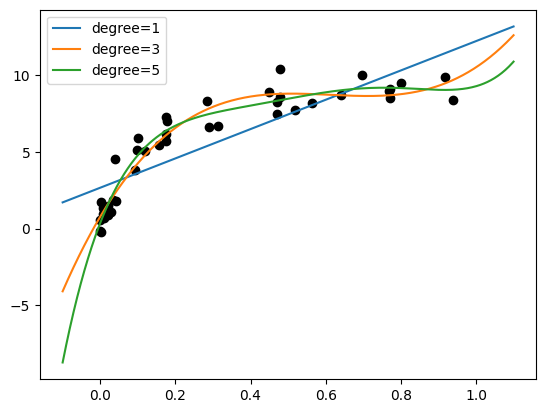

In [16]:
import matplotlib.pyplot as plt  # Import plotting library for visualization

# Create 500 evenly spaced test points between -0.1 and 1.1
# np.linspace generates 500 points in this range
# [:, None] reshapes the array to a 2D column vector (shape: 500 x 1)
X_test = np.linspace(-0.1, 1.1, 500)[:, None]  

# Plot the original training data points as black dots
# X.ravel() flattens X from 2D to 1D for plotting on x-axis
# y contains the corresponding target values for y-axis
plt.scatter(X.ravel(), y, color='black')  

# Loop over different polynomial degrees to compare fits
for degree in [1, 3, 5]:
    # Create and train polynomial regression model of the current degree
    model = PolynomialRegression(degree).fit(X, y)  
    
    # Predict target values for the test points (X_test)
    y_test = model.predict(X_test)  
    
    # Plot the predicted polynomial curve for these test points
    # X_test.ravel() flattens for plotting on x-axis
    # y_test is the predicted y-values on y-axis
    # label adds a legend entry showing the degree of the polynomial
    plt.plot(X_test.ravel(), y_test, label=f'degree={degree}')  

# Display the legend on the plot to distinguish curves by polynomial degree
plt.legend()


Results:

 Degree 1: Straight line - too simple (underfitting)

 Degree 3: Curved line - just right

 Degree 5: Wiggly line - too complex (overfitting noise)

Logic Summary:

We generate a smooth range of x-values (X_test) to visualize how the polynomial regression model fits across the input space.

The original data is plotted as scattered points for context.

For each polynomial degree (1, 3, and 5), we train the model, predict on X_test, and plot the curve.

This lets us visually compare how polynomial degree affects the fit — degree 1 is a straight line, degree 3 and 5 are progressively more flexible curves.

### Finding best Degree with validation curve

Text(0, 0.5, 'score')

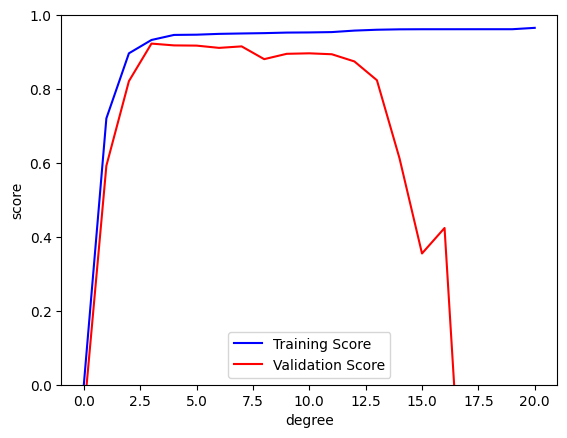

In [19]:
from sklearn.model_selection import validation_curve  # Import function to create validation curves

# Create an array of polynomial degrees from 0 to 20
# np.arange(0, 21) creates [0, 1, 2, ..., 20]
degrees = np.arange(0, 21)  

# Use validation_curve to compute training and validation scores
train_scores, val_scores = validation_curve(
    PolynomialRegression(),              # The model to evaluate (a pipeline with polynomial + linear regression)
    X, y,                                # Input data (features and target)
    param_name='polynomialfeatures__degree',  # The hyperparameter to vary (degree of polynomial)
    param_range=degrees,                 # The list of values to try for the parameter
    cv=7                                 # Use 7-fold cross-validation (split data into 7 parts)
)

# Plot the median training scores across all 7 folds
# degrees: x-axis (polynomial degrees from 0 to 20)
# np.median(train_scores, axis=1): y-axis (median of training scores across 7 CV folds for each degree)
# 'b-': plot with a blue solid line
# label='Training Score': used in legend to identify this curve
plt.plot(degrees, np.median(train_scores, axis=1), 'b-', label='Training Score')

# Plot the median validation scores across all 7 folds
# np.median(val_scores, axis=1): y-axis (median validation score for each degree)
# 'r-': plot with a red solid line
# label='Validation Score': used in legend to identify this curve
plt.plot(degrees, np.median(val_scores, axis=1), 'r-', label='Validation Score')

# Add a legend to differentiate between training and validation curves
# loc='best': automatically chooses the best position for the legend
plt.legend(loc='best')

# Set the y-axis range from 0 to 1 (since scores are usually in [0, 1] range like accuracy or R²)
plt.ylim(0, 1)

# Label the x-axis to show that it represents the degree of the polynomial
plt.xlabel('degree')

# Label the y-axis to show that it represents the model score (like accuracy or R²)
plt.ylabel('score')


What's happening:

For each degree 0-20:

Split data into 7 groups

7x train on 6 groups → test on left-out group

Calculate average R² score:

1.0 = perfect prediction

0.0 = predicts average

<0 = worse than guessing average

Key insights from plot:

📈 Blue line (Training): Always increases - higher degrees fit training data better

📉 Red line (Validation): Peaks at degree 3 - best for unseen data

➡️ After degree 3: Validation drops = overfitting (model memorizes noise)

### Using best data model (Degree = 3)

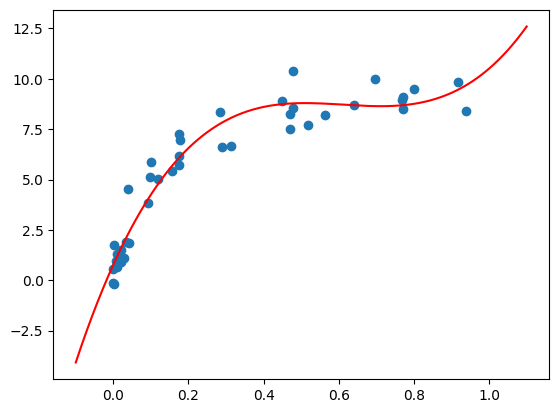

In [20]:

plt.scatter(X.ravel(), y)  # Plot data again

# Train degree-3 model on ALL data
model = PolynomialRegression(3).fit(X, y)  
y_test = model.predict(X_test)  # Predict
plt.plot(X_test.ravel(), y_test, 'r')  # Plot best-fit curve

Result:

Smooth curve that follows the true pattern

Ignores noise in data

Captures the underlying math 10 - 1/(x+0.1)

# What is a Learning Curve?
A learning curve shows how the model’s performance (both training and validation) changes as the size of the training dataset increases.

Small training set → Model might overfit (does well on training, poor on validation).

Large training set → Model might underfit if too simple (training & validation scores get closer).

The curve helps us understand whether more data will help, or whether we need a better model.

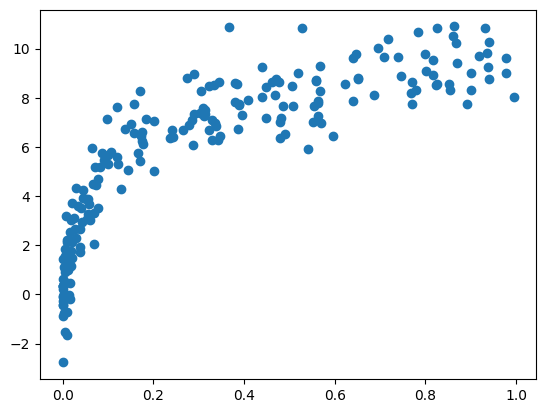

In [21]:
# Create a new dataset with more points (5x the previous)
X2, y2 = make_data(200)  # 200 samples instead of 40
plt.scatter(X2.ravel(), y2)  # Visualize the dataset


make_data(200) generates a synthetic dataset with 200 samples (instead of 40).

plt.scatter(...) plots these points to show how the data looks visually.

.ravel() flattens the array so we can plot 1D points.



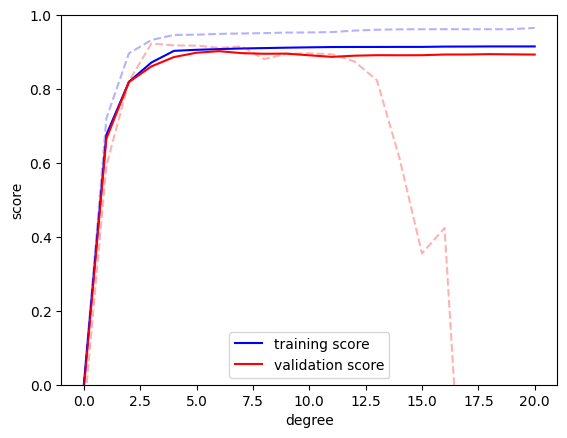

In [ ]:
# Set degrees from 0 to 20 to test different polynomial complexities
degree = np.arange(21)  # [0, 1, ..., 20]

# Run validation curve for the larger dataset using 7-fold cross-validation
train_score2, val_score2 = validation_curve(
    PolynomialRegression(),     # Our model pipeline
    X2, y2,                     # New larger dataset
    param_name='polynomialfeatures__degree',  # Parameter to change: degree of polynomial
    param_range= degree,                     # Try degree from 0 to 20
    cv=7                        # 7-fold cross-validation
)

plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_scores, 1), color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_scores, 1), color='red', alpha=0.3, linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')

validation_curve(...) tests different polynomial degrees.

train_score2 & val_score2 will be arrays of shape (21, 7) → one row per degree, 7 scores (one per fold).

cv=7 means 7 parts of the data are used to validate and train iteratively.

These are solid lines showing how performance changes with degree on the larger dataset.

np.median(..., axis=1) computes the median score across 7 folds for each degree.



Dashed curves show results from the previous dataset with only 40 points.

This helps compare how model complexity interacts with data size.



### 🔍 What Are We Talking About?

We are trying to understand:

1. How **complex** your model is (like how curvy the line is)
2. How **much data** you give it to learn from (like 40 points vs 200 points)

---

### 📈 What Did We See in the Graph?

* We trained models on two datasets:

  * One with **40 data points**
  * One with **200 data points**

* We tried different **polynomial degrees** (like degree 1, 2, 3… 20)

* We checked how well the model performed on:

  * The **training data** (what it has already seen)
  * The **validation data** (new data it hasn’t seen before)

---

### ✅ What Did We Learn?

1. **Bigger datasets can handle more complex models**

   * With 40 points, a complex model (degree 20) **overfits** (memorizes the data, but fails on new data).
   * With 200 points, a complex model still performs well — **no serious overfitting**.

2. **Both model complexity and dataset size matter**

   * You can't say a model is too complex without knowing how much data you have.
   * A small dataset = simple model is better.
   * A big dataset = can try more complex models.

---

### 📚 What is a Learning Curve?

A **learning curve** shows how the model improves as you give it more data.

---

### 🤔 How to Read a Learning Curve:

Let’s say you use the same model (like degree=5) and feed it more and more data:

* 🔹 **With little data:**

  * Training score is **high** (it memorized)
  * Validation score is **low** (it can’t generalize)
  * This means it’s **overfitting**

* 🔹 **With more data:**

  * Training score **goes down a bit** (less memorization)
  * Validation score **goes up** (better generalization)
  * This means it’s **learning properly**

* 🔹 **Eventually:**

  * Both scores get **close to each other**
  * But validation score never becomes better than training score
  * That’s the best your model can do with its current settings

---

### 💡 Summary (in plain words):

* If you have **little data**, don’t make the model too smart.
* If you have **lots of data**, you can make the model smarter (more complex).
* A **learning curve** helps you decide:

  > “Do I need more data?” or “Do I need a better model?”




## What is a Learning Curve?
A Learning Curve is a graph that shows how a machine learning model's performance improves as we feed it more training data.

It helps us:

Understand if the model is overfitting or underfitting

Decide whether we need more data or a different model

Choose the right model complexity



We will:

Train two models using different polynomial degrees (2 and 9)

Plot how their training and validation accuracy changes as the training size increases

Use these plots to understand how model complexity affects learning



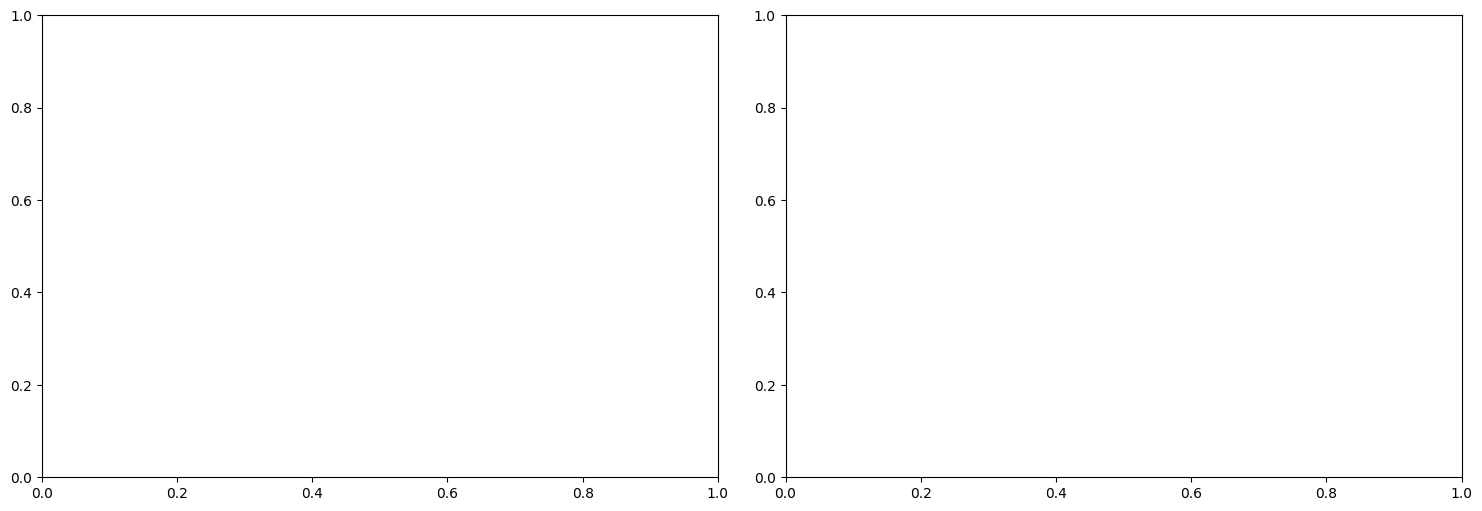

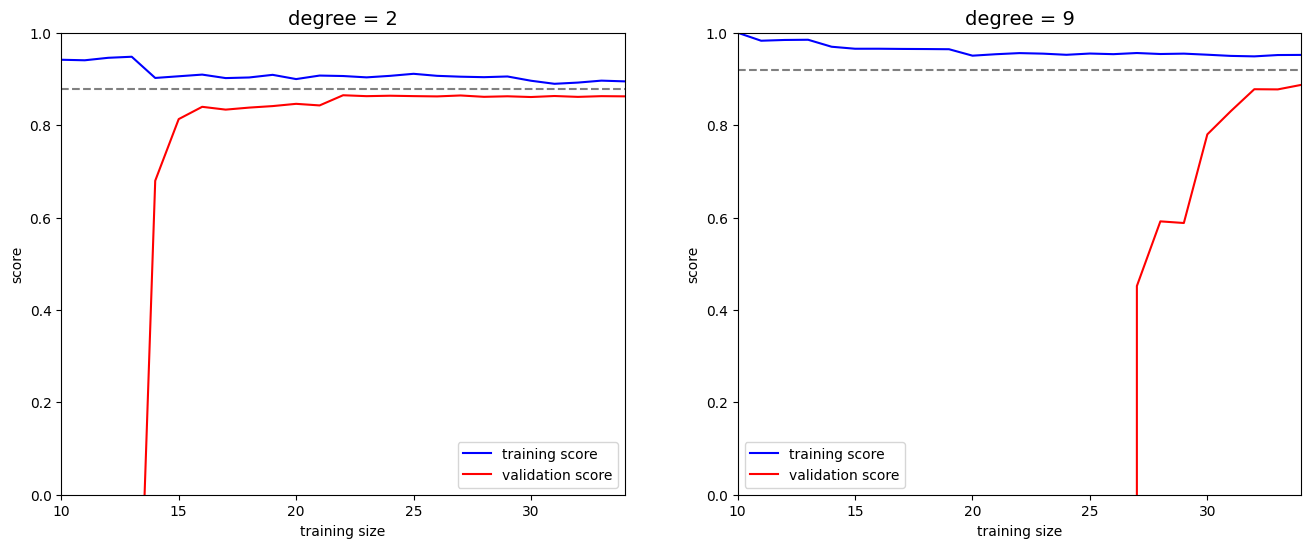

In [37]:
from sklearn.model_selection import learning_curve

# Create a figure and an array of 2 subplots arranged in 1 row and 2 columns
# figsize=(16, 6) sets the overall size of the figure to be 16 inches wide and 6 inches tall
fig, ax = plt.subplots(1, 2, figsize=(16, 6))  

# Adjust the layout of the subplots within the figure:
# - left=0.0625 moves the left edge of the subplots slightly right to leave some margin
# - right=0.95 moves the right edge slightly left to leave some margin
# - wspace=0.1 sets a small amount of horizontal space (width space) between the two subplots
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)  

ig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')